# Day 2
batch size 256 lr 1e-3, normed weighted, rotated

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.
/home/giles/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module

## Options

In [2]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_met_pt', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']
classModel = 'modelSwish'
varSet = "basic_rot_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 29 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_met_pt', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']


## Import data

In [20]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.572s 


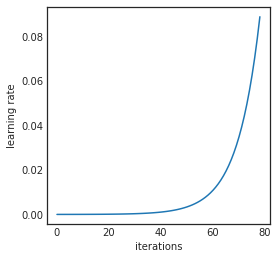

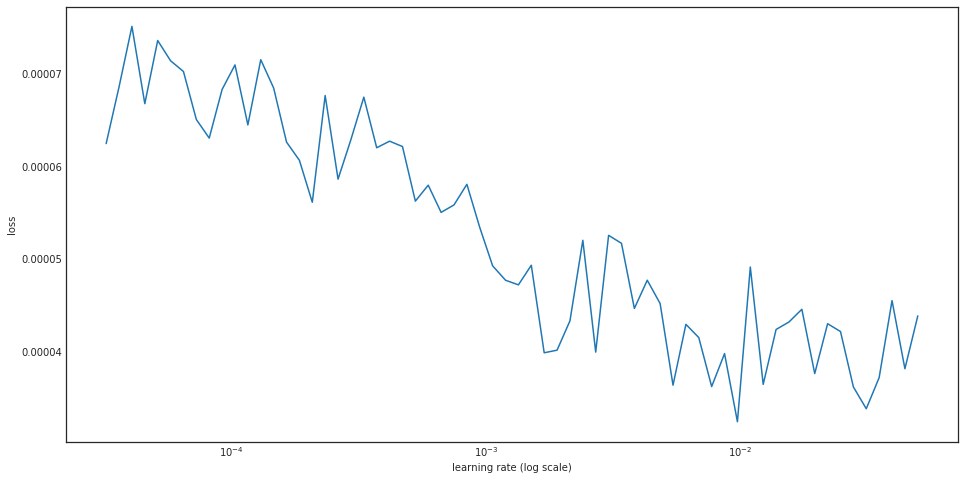

______________________________________



In [6]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [7]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 4.08759191512e-05
2 New best found: 3.71952939304e-05
3 New best found: 3.66746302722e-05
4 New best found: 3.62465934763e-05
5 New best found: 3.51892711724e-05
6 New best found: 3.46547509332e-05
7 New best found: 3.45178774194e-05
10 New best found: 3.44850837028e-05
12 New best found: 3.32596452567e-05
13 New best found: 3.32542310921e-05
14 New best found: 3.30762773452e-05
15 New best found: 3.30532974147e-05
19 New best found: 3.3013847955e-05
22 New best found: 3.26480017456e-05
23 New best found: 3.24025944177e-05
26 New best found: 3.22409465358e-05
28 New best found: 3.21502628062e-05
29 New best found: 3.21360628772e-05
30 New best found: 3.21160062505e-05
31 New best found: 3.21107718065e-05
48 New best found: 3.1923379641e-05
51 New best found: 3.19029332327e-05
53 New best found: 3.18272856962e-05
56 New best found: 3.18200125639e-05
57 New best fo

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107181). Check your callbacks.
  % delta_t_median)


1 New best found: 4.08346595055e-05
2 New best found: 3.64699931058e-05
3 New best found: 3.58832293903e-05
4 New best found: 3.49167947583e-05
5 New best found: 3.44618199505e-05
6 New best found: 3.3695079204e-05
7 New best found: 3.36115537404e-05
9 New best found: 3.33359343178e-05
10 New best found: 3.3223082857e-05
11 New best found: 3.28741773757e-05
12 New best found: 3.26492113394e-05
13 New best found: 3.25907895326e-05
14 New best found: 3.24782322185e-05
21 New best found: 3.24195305429e-05
22 New best found: 3.23740050555e-05
23 New best found: 3.22100510904e-05
25 New best found: 3.20856316376e-05
27 New best found: 3.20216621719e-05
29 New best found: 3.20006279439e-05
30 New best found: 3.1930937801e-05
31 New best found: 3.19290868687e-05
45 New best found: 3.19028030203e-05
49 New best found: 3.18552510013e-05
52 New best found: 3.18456970932e-05
53 New best found: 3.18203148186e-05
55 New best found: 3.17339912163e-05
57 New best found: 3.1703926733e-05
58 New best f

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.152472). Check your callbacks.
  % delta_t_median)


1 New best found: 4.18588478444e-05
2 New best found: 3.78331420168e-05
3 New best found: 3.68981085158e-05
4 New best found: 3.62192858118e-05
5 New best found: 3.5563872163e-05
6 New best found: 3.51592846855e-05
7 New best found: 3.50755511035e-05
10 New best found: 3.4741574697e-05
11 New best found: 3.44644141284e-05
12 New best found: 3.41792279407e-05
13 New best found: 3.40415593477e-05
14 New best found: 3.39971636106e-05
15 New best found: 3.39943059304e-05
20 New best found: 3.39376725717e-05
21 New best found: 3.38061948433e-05
22 New best found: 3.37397969399e-05
23 New best found: 3.36716033673e-05
24 New best found: 3.35091318223e-05
25 New best found: 3.34465036883e-05
27 New best found: 3.33817645219e-05
28 New best found: 3.33261396597e-05
29 New best found: 3.32894681428e-05
30 New best found: 3.32608535548e-05
44 New best found: 3.32343537422e-05
48 New best found: 3.31570113139e-05
50 New best found: 3.31030294526e-05
52 New best found: 3.3061017865e-05
54 New best

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.183741). Check your callbacks.
  % delta_t_median)


1 New best found: 4.00007380896e-05
2 New best found: 3.67019734586e-05
3 New best found: 3.54753917065e-05
4 New best found: 3.47677661997e-05
5 New best found: 3.42185258744e-05
6 New best found: 3.38851321346e-05
7 New best found: 3.38100870232e-05
8 New best found: 3.37163307591e-05
11 New best found: 3.29133472966e-05
12 New best found: 3.28454503535e-05
14 New best found: 3.27026053935e-05
15 New best found: 3.26780151428e-05
19 New best found: 3.25675997251e-05
22 New best found: 3.24247744999e-05
23 New best found: 3.23886878192e-05
24 New best found: 3.22852386893e-05
25 New best found: 3.21520113955e-05
26 New best found: 3.20783501769e-05
27 New best found: 3.20306815018e-05
28 New best found: 3.19413889557e-05
44 New best found: 3.1855783503e-05
50 New best found: 3.18123667943e-05
53 New best found: 3.17784661723e-05
54 New best found: 3.16417782546e-05
60 New best found: 3.16247704131e-05
61 New best found: 3.1611188503e-05
100 New best found: 3.15377568435e-05
109 New be

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204747). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102865). Check your callbacks.
  % delta_t_median)


1 New best found: 4.04291199232e-05
2 New best found: 3.74485713682e-05
3 New best found: 3.6765950873e-05
4 New best found: 3.621111203e-05
5 New best found: 3.52216384287e-05
6 New best found: 3.48996999716e-05
7 New best found: 3.48135601817e-05
9 New best found: 3.46371194151e-05
10 New best found: 3.45096393421e-05
11 New best found: 3.38776453691e-05
12 New best found: 3.37367356731e-05
13 New best found: 3.36760621272e-05
14 New best found: 3.35648891428e-05
15 New best found: 3.3539981555e-05
18 New best found: 3.34680388255e-05
21 New best found: 3.33581604303e-05
23 New best found: 3.33574169535e-05
24 New best found: 3.30537221625e-05
25 New best found: 3.30232259777e-05
27 New best found: 3.29937818809e-05
28 New best found: 3.29593418591e-05
29 New best found: 3.28559921121e-05
30 New best found: 3.28393476085e-05
31 New best found: 3.28346136645e-05
43 New best found: 3.28250806301e-05
47 New best found: 3.27292236071e-05
51 New best found: 3.26600486393e-05
52 New best f

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169143). Check your callbacks.
  % delta_t_median)


1 New best found: 4.09713906409e-05
2 New best found: 3.6848208022e-05
3 New best found: 3.62520721366e-05
4 New best found: 3.52518703172e-05
5 New best found: 3.48693731887e-05
6 New best found: 3.38868415348e-05
8 New best found: 3.36457686769e-05
9 New best found: 3.34612958127e-05
10 New best found: 3.31103490109e-05
11 New best found: 3.29871967538e-05
12 New best found: 3.27806196585e-05
13 New best found: 3.26664310801e-05
14 New best found: 3.26607565933e-05
15 New best found: 3.26008555162e-05
23 New best found: 3.25351474099e-05
24 New best found: 3.23326679566e-05
25 New best found: 3.20832248947e-05
26 New best found: 3.20721365399e-05
30 New best found: 3.20366289733e-05
31 New best found: 3.2035091196e-05
46 New best found: 3.19997428107e-05
49 New best found: 3.19535259623e-05
50 New best found: 3.18917892499e-05
53 New best found: 3.18159228301e-05
57 New best found: 3.18080880971e-05
60 New best found: 3.17958615839e-05
105 New best found: 3.17465798532e-05
106 New be

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.278372). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139673). Check your callbacks.
  % delta_t_median)


1 New best found: 4.16662962887e-05
2 New best found: 3.71796672307e-05
3 New best found: 3.66514619799e-05
4 New best found: 3.6391770769e-05
5 New best found: 3.47158628032e-05
6 New best found: 3.43269305883e-05
9 New best found: 3.37128154131e-05
11 New best found: 3.36483403752e-05
12 New best found: 3.34299239769e-05
13 New best found: 3.33807893384e-05
14 New best found: 3.32136298651e-05
15 New best found: 3.31805327616e-05
21 New best found: 3.31219770286e-05
22 New best found: 3.29814400382e-05
25 New best found: 3.28859887953e-05
26 New best found: 3.26694687492e-05
44 New best found: 3.2624944217e-05
48 New best found: 3.26177385652e-05
50 New best found: 3.24890120332e-05
59 New best found: 3.24530751572e-05
60 New best found: 3.24442764835e-05
96 New best found: 3.23931841309e-05
107 New best found: 3.23773180939e-05
113 New best found: 3.23322583685e-05
Early stopping after 163 epochs
Score is: {'loss': 3.233225836852407e-05, 'AUC': 0.09978897548708654, 'wAUC': 0.0660446

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.284432). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142762). Check your callbacks.
  % delta_t_median)


1 New best found: 4.045934501e-05
2 New best found: 3.68081367234e-05
3 New best found: 3.61317551835e-05
4 New best found: 3.55632685512e-05
6 New best found: 3.43003797789e-05
7 New best found: 3.42148675795e-05
9 New best found: 3.38616291673e-05
10 New best found: 3.3558437627e-05
11 New best found: 3.336446751e-05
12 New best found: 3.30062964337e-05
14 New best found: 3.29508747581e-05
15 New best found: 3.28960163374e-05
17 New best found: 3.27261169e-05
21 New best found: 3.25040682942e-05
25 New best found: 3.22484640453e-05
27 New best found: 3.22057737819e-05
28 New best found: 3.21746548853e-05
30 New best found: 3.21732493471e-05
31 New best found: 3.217143006e-05
44 New best found: 3.21418091287e-05
50 New best found: 3.19776918918e-05
53 New best found: 3.19409003259e-05
57 New best found: 3.19276150303e-05
60 New best found: 3.19054241562e-05
61 New best found: 3.18968328934e-05
62 New best found: 3.18903582643e-05
63 New best found: 3.18897553484e-05
99 New best found:

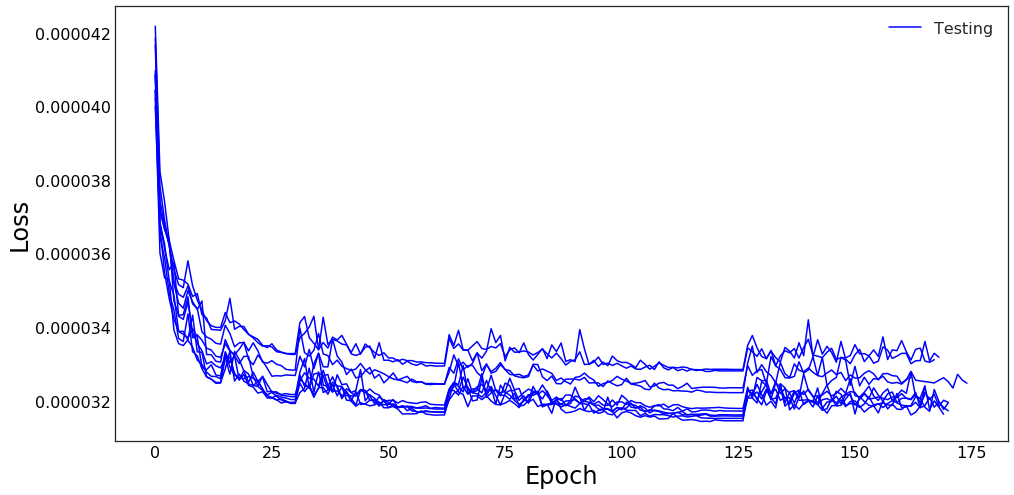

Mean wAUC = 0.0643 +- 0.0006
______________________________________



In [8]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=50, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [3]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [4]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 5 with loss = 3.143822626239711e-05
Model 1 is 1 with loss = 3.152070113002824e-05
Model 2 is 0 with loss = 3.158358304598299e-05
Model 3 is 3 with loss = 3.160546538009444e-05
Model 4 is 7 with loss = 3.169851632050135e-05
Model 5 is 9 with loss = 3.1788582405183306e-05
Model 6 is 6 with loss = 3.222257693729431e-05
Model 7 is 8 with loss = 3.233225836852407e-05
Model 8 is 4 with loss = 3.2798747252012695e-05
Model 9 is 2 with loss = 3.284456597095725e-05


## Response on development data

In [11]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00062860591931s per sample

Predicting batch 2 out of 10
Prediction took 0.000380647116307s per sample

Predicting batch 3 out of 10
Prediction took 0.000379653413512s per sample

Predicting batch 4 out of 10
Prediction took 0.000389920198917s per sample

Predicting batch 5 out of 10
Prediction took 0.000372887897491s per sample

Predicting batch 6 out of 10
Prediction took 0.000388791203499s per sample

Predicting batch 7 out of 10
Prediction took 0.000363056099415s per sample

Predicting batch 8 out of 10
Prediction took 0.000382538467439s per sample

Predicting batch 9 out of 10
Prediction took 0.000370850091672s per sample

Predicting batch 10 out of 10
Prediction took 0.000373862684891s per sample



In [12]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.901465244758, weighted 0.938345017849


## Response on val data

In [13]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000383477783203s per sample

Predicting batch 2 out of 10
Prediction took 0.000359370183945s per sample

Predicting batch 3 out of 10
Prediction took 0.000362801218033s per sample

Predicting batch 4 out of 10
Prediction took 0.000392979383469s per sample

Predicting batch 5 out of 10
Prediction took 0.000362978792191s per sample

Predicting batch 6 out of 10
Prediction took 0.00038549861908s per sample

Predicting batch 7 out of 10
Prediction took 0.000395844602585s per sample

Predicting batch 8 out of 10
Prediction took 0.00034958820343s per sample

Predicting batch 9 out of 10
Prediction took 0.000390810155869s per sample

Predicting batch 10 out of 10
Prediction took 0.00036066403389s per sample



In [14]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.89995923947, weighted 0.934247918697


## Evaluation

### Import in dataframe

In [15]:
def convertToDF(datafile, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [16]:
valData = convertToDF(valData)

50000 candidates loaded


In [17]:
sigVal = (valData.gen_target == 1)
bkgVal = (valData.gen_target == 0)

### MVA distributions

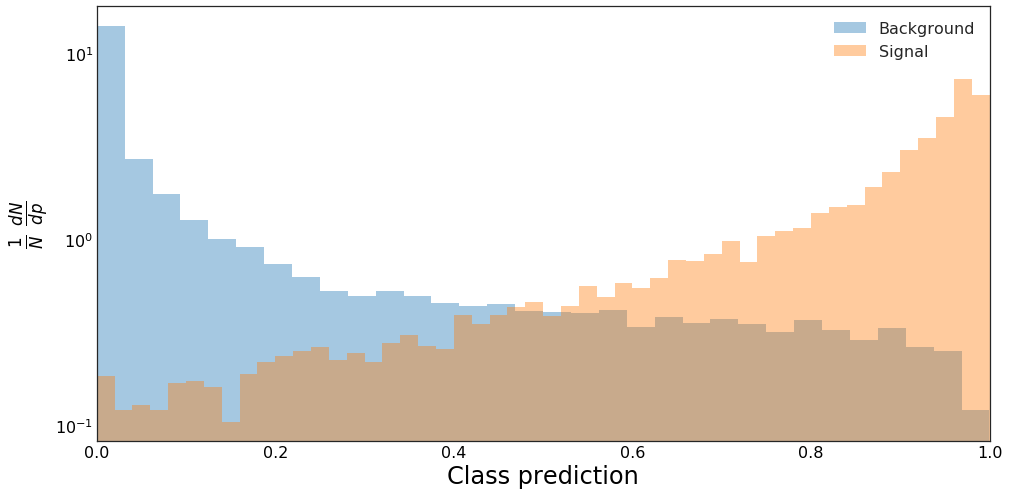

In [18]:
getClassPredPlot([valData[bkgVal], valData[sigVal]], weightName='gen_weight')

In [19]:
inData['ams'] = amsScan(valData)
sns.regplot(inData['pred_class'], inData['ams'])

[0.9550021290779114, 1.6751003880284905]


NameError: global name 'valData' is not defined

In [13]:
scoreTest(ensemble, weights)

Predicting batch 1 out of 10
Prediction took 0.000369764562087s per sample

Predicting batch 2 out of 10
Prediction took 0.000321447402781s per sample

Predicting batch 3 out of 10
Prediction took 0.000318057363684s per sample

Predicting batch 4 out of 10
Prediction took 0.000328161512722s per sample

Predicting batch 5 out of 10
Prediction took 0.000327983834527s per sample

Predicting batch 6 out of 10
Prediction took 0.000331799203699s per sample

Predicting batch 7 out of 10
Prediction took 0.000324949455261s per sample

Predicting batch 8 out of 10
Prediction took 0.000325188727812s per sample

Predicting batch 9 out of 10
Prediction took 0.000321700018102s per sample

Predicting batch 10 out of 10
Prediction took 0.000321820107373s per sample



In [20]:
saveTest(0.9550021290779114, 'Day_2_Basic_Features_256_1e-3_swish_mult2_50E_normedweighted_rot')

../Data/Day_2_Basic_Features_256_1e-3_swish_mult2_50E_normedweighted_rot_test.csv


!kaggle competitions submit -c higgs-boson -f Data/Day_2_Basic_Features_256_1e-3_swish_mult2_50E_normedweighted_rot_test.csv -m"Day2"